# Define the sample through explorative analysis of given twitter data and add more specific data for final sample




In [46]:
#### packages

# general
import pickle
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


## 1. Import and prepare data

In [39]:
with open("twitter_parties.pickle", "rb") as f:
    df = pickle.load(f)
    
df.head()

,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,mentionedUsers,hashtags,cashtags,media,outlinks,retweetedTweet,quotedTweet,inReplyToTweetId
0,2021-11-17 12:45:31+00:00,@m_kubiciel Wären Sie wohl so freundlich sich ...,@m_kubiciel Wären Sie wohl so freundlich sich ...,1460952237509943296,https://twitter.com/FREIEWAEHLER_BV,0,0,0,0,[https://twitter.com/m_kubiciel],None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,None,1460951587023638529
1,2021-11-17 06:56:40+00:00,@m_kubiciel Sehr geehrter Herr Prof. Dr. Kubic...,@m_kubiciel Sehr geehrter Herr Prof. Dr. Kubic...,1460864446520344576,https://twitter.com/FREIEWAEHLER_BV,1,0,1,0,[https://twitter.com/m_kubiciel],None,None,None,None,None,None,1460672248986193929
2,2021-11-15 14:04:49+00:00,Deutschlands Autobauer dürfen nicht einseitig ...,Deutschlands Autobauer dürfen nicht einseitig ...,1460247418277175313,https://twitter.com/FREIEWAEHLER_BV,2,1,2,0,None,None,None,None,[https://www.freiewaehler.eu/unsere-politik/wa...,None,None,1460247416586842114
3,2021-11-15 14:04:48+00:00,Seit Jahren setzen wir #FREIEWÄHLER uns für di...,Seit Jahren setzen wir #FREIEWÄHLER uns für di...,1460247416586842114,https://twitter.com/FREIEWAEHLER_BV,1,3,9,0,None,"[FREIEWÄHLER, Wasserstoff]",None,None,[https://www.faz.net/aktuell/wirtschaft/untern...,None,None,None
4,2021-11-13 19:00:00+00:00,Vorkaufsrecht reformieren – Wohnungsbauinitiat...,Vorkaufsrecht reformieren – Wohnungsbauinitiat...,1459596927658610694,https://twitter.com/FREIEWAEHLER_BV,1,8,14,0,None,None,None,[Photo(previewUrl='https://pbs.twimg.com/media...,[https://www.freiewaehler.eu/unsere-politik/wa...,None,None,None


### 1.1 filter based on data per year

In [49]:
# number of tweets per party
df.user = df.user.apply(str) # for firther usage turn userlink into string
Counter(df.user.apply(str))

# this gives us a hit that some parties have in general very few tweets

Counter({'https://twitter.com/FREIEWAEHLER_BV': 1544,
         'https://twitter.com/DiePARTEI': 2339,
         'https://twitter.com/Tierschutzparte': 7678,
         'https://twitter.com/oedp_de': 4777,
         'https://twitter.com/Piratenpartei': 31079,
         'https://twitter.com/VoltDeutschland': 3553,
         'https://twitter.com/Bayernpartei': 9307,
         'https://twitter.com/BVBFW': 4410,
         'https://twitter.com/LKR_Partei_Bund': 447,
         'https://twitter.com/SSWpresse': 1088,
         'https://twitter.com/npdde': 308,
         'https://twitter.com/TierschutzH': 218,
         'https://twitter.com/Allianz_MTN': 2813,
         'https://twitter.com/republikaner': 4399,
         'https://twitter.com/freiesachsen_': 154})

<AxesSubplot:xlabel='date'>

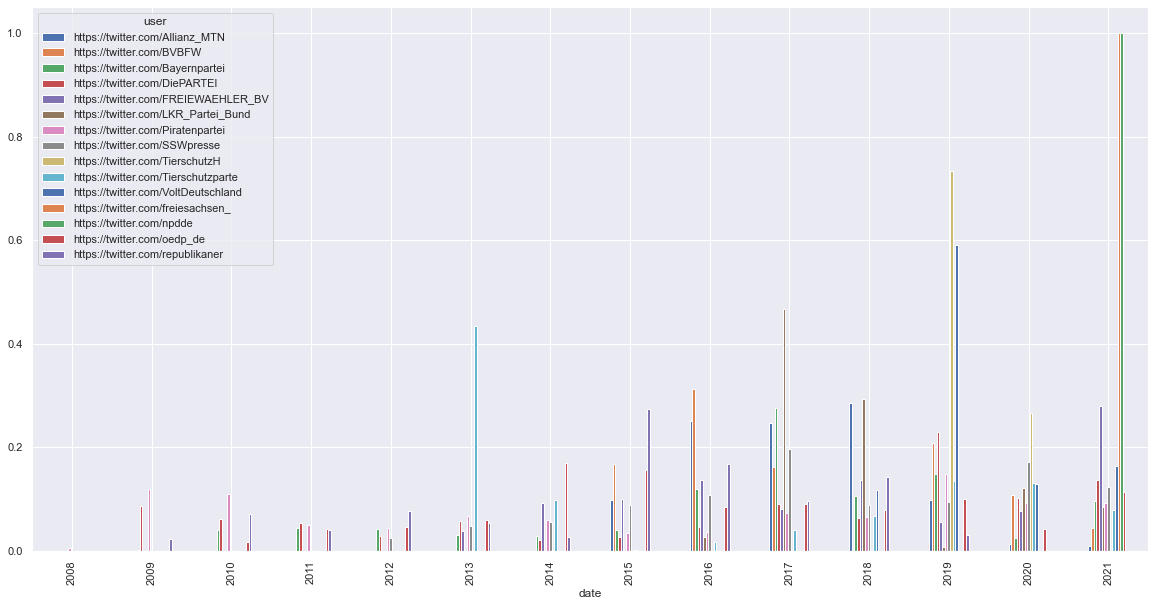

In [50]:
# first plotting to get a visual impression

fig, ax = plt.subplots(figsize=(20,10))

f = df.groupby(['date', 'user']).size().unstack()
f["date"] = [pd.to_datetime(i) for i in f.index]
f_2 = f.groupby(f["date"].dt.year).count()
f_2.update(f_2.div(f_2.sum(axis=0),axis=1))
f_2.drop(labels=["date"], axis=1).plot(kind="bar",ax=ax) 
#plot fractional to get a better impression an to let absolute numbers not influence judgement

In [ ]:
# because we wont have the financial report for 2021 we mainly look at the happening arounf the elections 2013 and 2017
# the parties therefor need to be active around these times to be eligeble for my analysis

# out: TierschutzH(only active since 2019), freiesachsen_(only 2021),npd(only 2021), volt(only since 2018)


In [51]:
### 1.2 remove the 4 parties that are not long enough active on twitter 

In [52]:
parties_to_remove = ["https://twitter.com/TierschutzH","https://twitter.com/freiesachsen_",
                    "https://twitter.com/npdde","https://twitter.com/VoltDeutschland"]

df_filtered = df[~df["user"].isin(parties_to_remove)]

<AxesSubplot:xlabel='date'>

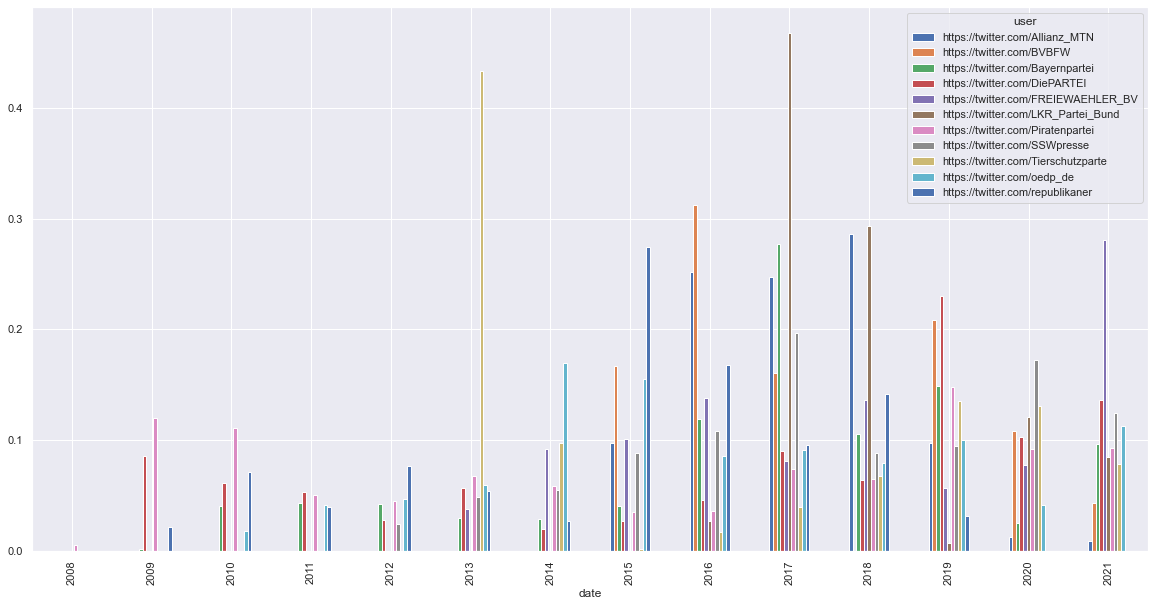

In [53]:
# plot this monthly over total time again
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
f = df_filtered.groupby(['date', 'user']).size().unstack()
f["date"] = [pd.to_datetime(i) for i in f.index]
f_2 = f.groupby(f["date"].dt.year).count()
f_2.update(f_2.div(f_2.sum(axis=0),axis=1))
f_2.drop(labels=["date"], axis=1).plot(kind="bar",ax=ax) 

In [54]:
# general lack of data for most parties before 2013
## but including 2013 would be good since it was a state election
## double but therefore the choosen parties must have been active throughout the year 2013 > need to be active in 2012 already

# > look at parties active since 2012 - excetp SSWpresse also all active since 2010
# Take that sample: 
# Partysample based on twitter availability:
# ['https://twitter.com/DiePARTEI','https://twitter.com/Bayernpartei','https://twitter.com/Piratenpartei', 
#'https://twitter.com/oedp_de', 'https://twitter.com/republikaner']

# timeframe atm 2010-2021

## 2. set timeframe

In [55]:
# we have the financial reports from 2002 until 2020
# they are published in spring of the following year (report 2020 published in april 2021)
# the payout for example during the year 2020 is based on the report from 2019, 
# and then adjusted based on the report for 2020
# the money is payed quaterly
# since the procedure is very transsparent the numbers in the yearly report wont be a suprise
# each party can calculate before hand what the can expect
# therefore it makes no sense to set the report publication as a important timeframe
# but since the finances are calculated yearly it seems to be logic to go for a yearly time framing
# how election years influence the activity we will control with respective variables

Research im Internet nach Wahlbeteiligungen um zu schauen inwiefern das sample vergleichbar ist.


"DiePartei"
Bund - 2013: 0,18%, 2017: 0,98%, 2021: 0,99%
europa - 2014: 0.63%, 2019; 2.4%

"OEDP" 2013: 0.3%m 2017: 0.3%, 2021: 0.2%
europa: 2014: 0.6%, 2019: 1.0%

"Piratenpartei" 2009: 2%, 2013: 2.2%, 2017: 0.4%, 2021: 0.4%
europa: 2014: 1.4%, 2019: 0.7%

"Bayernpartei" (ergebisse = stimmanteil in Bayern)
Bund - 2013: 0.9%, 2017: 0.8%, 2021: 0.4%
europa -  2014: 1.3%, 2019: 0.9%

"republikaner" 2013: 0.2%, 2017/2021 nicht angetreten
europa: : 2013: 0.2, 2019 nicht angetreten

4 der 5 Parteien haben an allen Wahlen seit 2010 auf bundes und eu ebene teilgenommen. Der Datenmenge wegen werden die rpublikaner als twitter aktiv aber beibehalten. Die Bayernpartei hat auch lediglich in bayern an den wahlen teilgenommen - auf basis der wahlbeteiligung sind alle parteien also nur gemäßigt vergleichbar.




In [58]:
parties_to_remove_2 = ["https://twitter.com/BVBFW","https://twitter.com/LKR_Partei_Bund",
                    "https://twitter.com/SSWpresse","https://twitter.com/Allianz_MTN",
                      'https://twitter.com/FREIEWAEHLER_BV', 'https://twitter.com/Tierschutzparte']

df_final = df_filtered[~df_filtered["user"].isin(parties_to_remove_2)]

In [59]:
Counter(df_final.user)

Counter({'https://twitter.com/DiePARTEI': 2339,
         'https://twitter.com/oedp_de': 4777,
         'https://twitter.com/Piratenpartei': 31079,
         'https://twitter.com/Bayernpartei': 9307,
         'https://twitter.com/republikaner': 4399})

In [60]:
# von den frühsten tweets nehmen mir den spätesten als beginn für die datensatz eingrenzung für bessere Vergleichbarkeit

first_tweets = df_final.groupby(["user"]).min().date
print(first_tweets)

#die freien whäler und die tierschutzbarpertei haben erst kurz vor der Bundestagswahl 2013 den ersten tweet rausgelassen > schade

user
https://twitter.com/Bayernpartei    2009-07-01 14:52:51+00:00
https://twitter.com/DiePARTEI       2009-08-14 10:46:13+00:00
https://twitter.com/Piratenpartei   2008-04-09 13:25:15+00:00
https://twitter.com/oedp_de         2010-07-30 10:16:12+00:00
https://twitter.com/republikaner    2009-05-25 15:37:04+00:00
Name: date, dtype: datetime64[ns, UTC]


C:\Users\Lion\AppData\Local\Temp/ipykernel_1224/3807278582.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  first_tweets = df_final.groupby(["user"]).min().date


In [61]:
# die ödp hat erst mitte 2010 mit twitter angefangen - im hinterkopf behalten - ggf. 2011 als start jahr oder ödp raus


In [ ]:
#final parties

#> bayernpartei, durchgängig in der Parteienfinanzierung
#> diePARTEI, 2014 - bis heute
#> Piratenpartei, durchgängig
#> OEDP, durchgängig

# erfüllen die explorativ gefunden kriterien


# Da für die gefunden Parteien keine schwankung in der partizipation an der parteienfinanzierung gegeben ist muss der Forschungsfokus abgeändert werden
# Daher wird die analyse im folgenden auf die Hähe der finanzierung gerichtet sein, nicht auf das haben oder nicht
# lässt sich eine correlation zwischen höhe der finanzierung("finanziellen erfolg"), wahl erfolg und twitter aktivität feststellen?
# aufgrund des neuen forschungsblickpunktes wäre es durchaus interesssant nun doch die großen Parteien der analyse hinzuzufügen
####> um aber zunächst den Überblick zu behalten beschränken wir uns für dne Moment auf die selektiereten

#nebenbei zu erfassen: wie relevant sind die einzelnen Wahlen für die parteien (Europa vs. Bund vs. Land(Bayernpartei))?

In [62]:
# save sample

file = open("twitter_sample.obj","wb")
pickle.dump(df_final,file)
file.close()

#### Summary - reduce data to party sample and timeframe

So far we have reduced the number of parties and the timeframe explorative and generated the criteria on the go: First the parties needed to be between the thresholds - that yielded 41, then they needed to have a twitter account - down to ca. 27, after checking from when on and how consitently they tweeted to have appropiate data we where down to 5. These 5 parties are very different and reach from regional orinted parties (Bayernpartei) to statewide active ones (Piraten/diePartei) to parties that are not even participating in every statewide election (repuplikaner). What these parties have in common, and why we choose them is that they receive funding, are not in the state parliment and are active on twitter since 2010. They therefore fit the research goal to research how parties (state) funding and their online activity on twitter are connected. 

Are possible expension later on would be to also scrape the respective facebook data - other social media do not make sense because they dont exist long enough or the they contain video formats only which would go to far for this project

## 3. get more detailed finacial data from revenue reports of the respective parties

In [64]:
revenue_reports = pd.read_csv("rechenschaftsberichte.csv", sep=";")
revenue_reports.head()

,partei,jahr,member_fee,mandate_holder_contributions_and_sim,donations_indiv,donations_legal,income_business_participations,income_other sources,income_events_sales,gov_funds,...,exp_personnel,exp_ongoing_operations,exp_general_political_work,exp_elec_camp,exp_asset_management,exp_other_interest,exp_other,exp_total,net,exp_corprate_activities
0,PIRATEN,2010,"372986,97",0,"204819,55","12922,28",0,"579,18","20203,48","585162,46",...,"136,5","198963,58","283978,13","87410,44",0,"1,71","281,3","570771,66","654376,21",x
1,PIRATEN,2011,"402966,11",0,"345302,42","30530,92",0,"1285,75","25117,16","578219,55",...,"1274,63","359473,99","386165,39","298898,11",0,"0,22","205,85","1046018,19","354529,45",x
2,PIRATEN,2012,"853240,86",0,"819072,73","35977,21","6750,02","3737,63","19672,25","792487,67",...,"25074,15","621421,31","762108,92","394749,32",0,0,"16030,82","1819384,52","807316,8",x
3,PIRATEN,2013,"751310,07",0,"825747,77","13812,14","91168,83","3037,69","3742,26","1738450,7",...,"134627,75","745620,37","862610,02","1103335,77",0,"8,09","462301,86","3308503,86","535794,29",x
4,PIRATEN,2014,"598347,41",0,"477641,61","3112,21","28506,79","2955,55","3195,99","1618629,48",...,305238,"726471,55","695418,95","713864,05",0,"44,53","125221,84","2566258,92","341010,87",x


In [66]:
#change jahr into datatime. change rest to floats (replace , with .)
def clean_col(column):
    output = []
    for i in column:
        if type(i) != float:
            v = i.replace(".","").replace(",",".").replace(" ","")
            try:
                output.append(float(v))
            except:
                output.append(np.nan)
        else:
            output.append(i)
    return output

revenue_reports.iloc[:,2:] = revenue_reports.iloc[:,2:].apply(clean_col,axis=0)
revenue_reports.loc[:,"jahr"] = pd.to_datetime(revenue_reports.loc[:,'jahr'], format='%Y')


In [67]:
revenue_reports.head()

,partei,jahr,member_fee,mandate_holder_contributions_and_sim,donations_indiv,donations_legal,income_business_participations,income_other sources,income_events_sales,gov_funds,...,exp_personnel,exp_ongoing_operations,exp_general_political_work,exp_elec_camp,exp_asset_management,exp_other_interest,exp_other,exp_total,net,exp_corprate_activities
0,PIRATEN,2010-01-01,372986.97,0.0,204819.55,12922.28,0.00,579.18,20203.48,585162.46,...,136.50,198963.58,283978.13,87410.44,0.0,1.71,281.30,570771.66,654376.21,NaN
1,PIRATEN,2011-01-01,402966.11,0.0,345302.42,30530.92,0.00,1285.75,25117.16,578219.55,...,1274.63,359473.99,386165.39,298898.11,0.0,0.22,205.85,1046018.19,354529.45,NaN
2,PIRATEN,2012-01-01,853240.86,0.0,819072.73,35977.21,6750.02,3737.63,19672.25,792487.67,...,25074.15,621421.31,762108.92,394749.32,0.0,0.00,16030.82,1819384.52,807316.80,NaN
3,PIRATEN,2013-01-01,751310.07,0.0,825747.77,13812.14,91168.83,3037.69,3742.26,1738450.70,...,134627.75,745620.37,862610.02,1103335.77,0.0,8.09,462301.86,3308503.86,535794.29,NaN
4,PIRATEN,2014-01-01,598347.41,0.0,477641.61,3112.21,28506.79,2955.55,3195.99,1618629.48,...,305238.00,726471.55,695418.95,713864.05,0.0,44.53,125221.84,2566258.92,341010.87,NaN


## 4. gather election result data

In [68]:
# https://github.com/bundestag/wahlergebnisse/blob/master/wahlergebnisse.json

In [78]:
import requests
import json

url = 'https://raw.githubusercontent.com/bundestag/wahlergebnisse/master/wahlergebnisse.json'
resp = requests.get(url)
data = json.loads(resp.text)
#print(data)

In [79]:
elect_12_20 = []
e_title = []
for election in data:
    e = election["title"]
    if int(e[-4:]) >= 2010 and int(e[-4:]) <= 2020:
        elect_12_20.append(election)
        e_title.append(e)
        
len(elect_12_20)

39

In [80]:
# transform dicts to dataframes

elect_results = {}
for e,t in zip(elect_12_20,e_title):
    df_temp = pd.DataFrame.from_dict(e["results"], orient="index").reset_index()
    
    df_temp = df_temp[["index","pct","votes"]]
                         
    df_temp.rename(columns={"index":"party"},inplace=True)
    elect_results[t] = df_temp

In [81]:
elect_results

{'Abgeordnetenhauswahl Berlin 2011':                party    pct    votes
 0                SPD  28.30      NaN
 1                CDU  23.30      NaN
 2              Grüne  17.60      NaN
 3              Linke  11.70      NaN
 4                FDP   1.84  26943.0
 5            Piraten   8.90      NaN
 6                NPD   2.14  31241.0
 7   Tierschutzpartei   1.48  21654.0
 8              PRODE   1.22  17838.0
 9           FREIHEIT   0.96  14073.0
 10        Die Partei   0.88  12861.0
 11               BIG   0.55   8012.0
 12               DKP   0.25   3618.0
 13      KONSERVATIVE   0.16   2332.0
 14               ÖDP   0.13   1940.0
 15               PSG   0.12   1690.0
 16              BüSo   0.11   1676.0
 17           Familie   0.10   1421.0
 18               DDP   0.09   1272.0
 19       Unabhängige   0.06    834.0
 20                 B   0.05    671.0
 21              APPD   0.03    401.0,
 'Abgeordnetenhauswahl Berlin 2016':                    party    pct   votes
 0          

In [82]:
# aim data drame:

###
#party #election #pct 


election_df = pd.DataFrame(columns=["party","pct","election"])

for k,v in elect_results.items():
    filter_df  = v[v["party"].isin(["Die Partei","Piraten","ÖDP","BP","Die PARTEI","ödp","REP"])]
    filter_df = filter_df[["party","pct"]]
    filter_df["election"] = k
    election_df=election_df.append(filter_df)
    
election_df.reset_index(inplace=True)
election_df.drop(columns=["index"],inplace=True)
election_df

,party,pct,election
0,Piraten,8.90,Abgeordnetenhauswahl Berlin 2011
1,Die Partei,0.88,Abgeordnetenhauswahl Berlin 2011
2,ÖDP,0.13,Abgeordnetenhauswahl Berlin 2011
3,Die Partei,1.95,Abgeordnetenhauswahl Berlin 2016
4,Piraten,1.73,Abgeordnetenhauswahl Berlin 2016
...,...,...,...
107,ÖDP,0.44,Landtagswahl Thüringen 2019
108,Piraten,0.36,Landtagswahl Thüringen 2019
109,Die Partei,1.40,Bürgerschaftswahl Hamburg 2020
110,ÖDP,0.68,Bürgerschaftswahl Hamburg 2020


In [83]:
# split election into level and year and add to dataframe
election_raw = []
year = []
level = []

for s in election_df.loc[:,"election"]:
    j = s[-4:]
    e = s[:-4].strip()
    if e == "Bundestagswahl":
        l = "state"
    elif e=="Europawahl in Deutschland":
        l = "EU"
    else:
        l = "federal state"
    election_raw.append(e)
    year.append(j)
    level.append(l)
    
election_df["election_only"] = election_raw
election_df["year"] = year
election_df["level"] = level

In [84]:
election_df

,party,pct,election,election_only,year,level
0,Piraten,8.90,Abgeordnetenhauswahl Berlin 2011,Abgeordnetenhauswahl Berlin,2011,federal state
1,Die Partei,0.88,Abgeordnetenhauswahl Berlin 2011,Abgeordnetenhauswahl Berlin,2011,federal state
2,ÖDP,0.13,Abgeordnetenhauswahl Berlin 2011,Abgeordnetenhauswahl Berlin,2011,federal state
3,Die Partei,1.95,Abgeordnetenhauswahl Berlin 2016,Abgeordnetenhauswahl Berlin,2016,federal state
4,Piraten,1.73,Abgeordnetenhauswahl Berlin 2016,Abgeordnetenhauswahl Berlin,2016,federal state
...,...,...,...,...,...,...
107,ÖDP,0.44,Landtagswahl Thüringen 2019,Landtagswahl Thüringen,2019,federal state
108,Piraten,0.36,Landtagswahl Thüringen 2019,Landtagswahl Thüringen,2019,federal state
109,Die Partei,1.40,Bürgerschaftswahl Hamburg 2020,Bürgerschaftswahl Hamburg,2020,federal state
110,ÖDP,0.68,Bürgerschaftswahl Hamburg 2020,Bürgerschaftswahl Hamburg,2020,federal state


In [85]:
election_df.head() ## done, save


import pickle
file = open("elect_data.obj","wb")
pickle.dump(election_df,file)
file.close()